## Linear Regression & Gradient Descent

### What is Linear regression?

###  Linear regression is a statistical method that allows us to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to fit a line to the data that best explains the relationship between the variables. This line can be represented by the equation of a straight line, which is known as the regression line.

Example of sovling slope and intercept directly use cupy.polyfit()

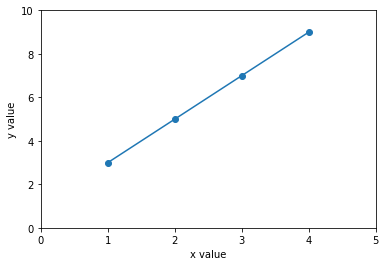

In [34]:
import cupy as cp
import matplotlib.pyplot as plt

# linear regression directly use cupy.polyfit()
X = cp.array([1, 2, 3, 4])
y = cp.array([3, 5, 7, 9])
slope,intercept = cp.polyfit(X, y, 1)

def myfunc(x):
 return slope * x + intercept

plt.scatter(X.get(), y.get())
plt.plot(X.get(), myfunc(X).get())
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=5)
plt.xlabel("x value")
plt.ylabel ("y value")
plt.show()


Example of sovling slope(weights) and intercept(bias) use equations:<br><br>
    $slope =\dfrac{n * \sum_{} x y - (\sum_{} x) * (\sum_{} y)}{n * \sum_{} x^2 - (\sum_{} x)^2}$
    <br><br>intercept = mean(y) - slop * mean(X)
    <br><br>n: number of data points

predictions1 with the equation: [[ 9.]
 [11.]
 [13.]]
predictions2 with the cp.linalg.solve(): [ 9.85714286 12.28571429 14.71428571]


Text(0, 0.5, 'y value')

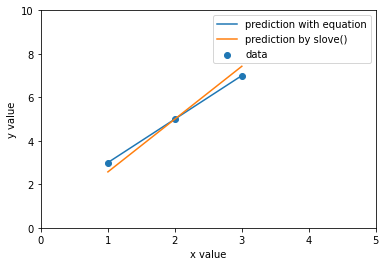

In [10]:
# can also write a linear regression model
import cupy as cp
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights1 = None
        self.bias1 = None
        self.weights2 = None
        self.bias2 = None
    
    def fit(self, X, y):
        #X = cp.array(X)
        #y = cp.array(y)
        #self.weights = cp.linalg.inv(X.T @ X) @ X.T @ y
        
        n = X.shape[0]
        numerator = n * (y @ X) - cp.sum(X, axis = 0) * cp.sum(y)
        denominator = n * X.T @ X - (cp.sum(X, axis = 0))**2
        self.weights1 = numerator / denominator
        self.bias1 = cp.mean(y) - cp.mean(X @ self.weights1)
    
        self.weights2 = cp.linalg.solve(X.T @ X, X.T @ y)
        self.bias2 = cp.mean(y) - cp.mean(X @ self.weights2)


    def predict1(self, X):
        X = cp.array(X)
        return X @ self.weights1 + self.bias1

    def predict2(self, X):
        X = cp.array(X)
        return X @ self.weights2 + self.bias2


model = LinearRegression()
X = cp.array([[1],[2],[3]])
y = cp.array([3,5,7])
model.fit(X, y)
test = [[4],[5],[6]]
predictions1 = model.predict1(test)
predictions2 = model.predict2(test)
print('predictions1 with the equation: ' + str(predictions1))
print('predictions2 with the cp.linalg.solve(): ' + str(predictions2))

plt.scatter(X.get(), y.get())
plt.plot(X.get(), model.predict1(X).get())
plt.plot(X.get(), model.predict2(X).get())
plt.legend(['prediction with equation','prediction by slove()','data'])
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=5)
plt.xlabel("x value")
plt.ylabel ("y value")


### What is Gradient Descent?

### Gradient descent is an optimization algorithm that is commonly used to find the minimum of a loss function in machine learning models. In linear regression, the loss function is typically defined as the sum of squared errors between the actual target values and the predicted values. The gradient descent algorithm updates the model parameters iteratively in the direction of the steepest decrease of the loss function, until the minimum is reached.
### However, linear regression can be solved analytically without using gradient descent. One common method is the ordinary least squares (OLS) method, which finds the line of best fit by minimizing the sum of squared residuals between the observed target values and the predicted values. The OLS solution can be expressed in closed-form as the dot product of the inverse of the design matrix and the target vector.

Example of Linear Regression with Gradient Descent

In [68]:
import cupy as cp
import numpy as np

class LinearRegressionGrad:
    # change learning_rate to smaller value when prediction seems incorrect
    # larger learning rate may miss the global optimal
    def __init__(self, learning_rate=0.001, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        # Convert inputs to Cupy arrays
        X = cp.array(X)
        y = cp.array(y)

        # Initialize weights and bias
        self.weights = cp.ones(X.shape[1])
        self.bias = cp.zeros(1)

        # Iteratively update weights and bias
        # use the Ordinary Least Squares (OLS) method, which finds the line of best fit by minimizing
        # the sum of squared residuals between the observed target values and the predicted values
        # OLS solution expressed in closed-form (inverse of the design matrix) @ (target vector)
        for i in range(self.num_iterations):
            y_pred = X @ self.weights + self.bias
            residuals = y_pred - y
            gradient_weights = X.T @ residuals
            gradient_bias = cp.sum(residuals)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias
            #print('self.weights is: ' + str(self.weights))
            #print('self.bias is: ' + str(self.bias))

    def predict(self, X):
        X = cp.array(X)
        return X @ self.weights + self.bias

self.weights is: [2.14384917]
self.bias is: [0.67299698]
predictions with input [[4],[5],[6]]: [ 9.24839367 11.39224284 13.53609201]


Text(0, 0.5, 'y value')

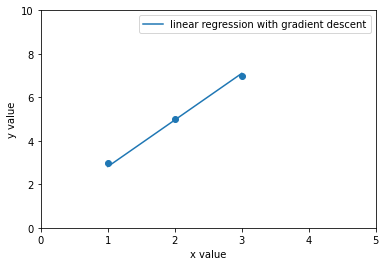

In [41]:
lg = LinearRegressionGrad()
lg.fit([[1],[2],[3]], [3,5,7])
result = lg.predict([[4], [5], [6]])
print('predictions with input [[4],[5],[6]]: ' + str(result))

X = cp.array([[1],[2],[3]])
y = cp.array([3,5,7])
plt.scatter(X.get(), y.get())
plt.plot(X.get(), lg.predict(X).get())
plt.legend(['linear regression with gradient descent'])
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=5)
plt.xlabel("x value")
plt.ylabel ("y value")

### What is Multiple Linear Regression?

### A regression model is a statistical model that estimates the relationship between one dependent variable and one or more independent variables using a line (or a plane in the case of two or more independent variables).
### Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

Linear regression most often uses mean-square error (MSE) to calculate the error of the model. MSE is calculated by:

1. measuring the distance of the observed y-values from the predicted y-values at each value of x;
2. squaring each of these distances;
3. calculating the mean of each of the squared distances.

Linear regression fits a line to the data by finding the regression coefficient that results in the smallest MSE.

In [43]:
# can also write a linear regression model
import cupy as cp
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        #X = cp.array(X)
        #y = cp.array(y)
        
        #self.weights = cp.linalg.inv(X.T @ X) @ X.T @ y
        self.weights = cp.linalg.solve(X.T @ X, X.T @ y)
        self.bias = cp.mean(y) - cp.mean(X @ self.weights)
        print('self.weights is: ' + str(self.weights))
        print('self.bias is: ' + str(self.bias))

    def predict(self, X):
        X = cp.array(X)
        return X @ self.weights + self.bias

model = LinearRegression()
X = cp.array([[1, 2, 3], [2, 3.8, 6], [3, 6, 9], [4, 8, 12]])
y = cp.array([2, 4, 6, 8])
model.fit(X, y)
test = [[5, 10, 15]]
predictions = model.predict(test)
print('predictions with input [[5, 10, 15]]: ' + str(predictions))


self.weights is: [ 1.94636330e-13 -1.36642834e-13  6.66666667e-01]
self.bias is: -1.7763568394002505e-15
predictions with input [[5, 10, 15]]: [10.]


In [69]:
# MLR with grad
lg = LinearRegressionGrad()
X = cp.array([[1, 2, 3], [2, 3.8, 6], [3, 6, 9], [4, 8, 12]])
y = cp.array([2, 4, 6, 8])
lg.fit(X, y)
result = lg.predict([[5, 10, 15]])
print('MLR with grad predictions with input [[5, 10, 15]]: ' + str(result))

MLR with grad predictions with input [[5, 10, 15]]: [10.08592582]
